In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
sns.set_style('darkgrid')

In [4]:
data = pd.read_csv('ev_range.csv')
data.head()

,vin_nbr,element_cd,element_timstm,element_val
0,1G1FZ6S05K4100048,ODO_READ,2020-06-01 03:54:15,11796.531250
1,1G1FZ6S05K4100048,ODO_READ,2020-06-01 04:53:16,11800.656250
2,1G1FZ6S05K4100048,ODO_READ,2020-06-01 04:54:47,11800.656250
3,1G1FZ6S05K4100048,ODO_READ,2020-06-01 06:19:39,11819.359375
4,1G1FZ6S05K4100048,ODO_READ,2020-06-01 10:03:13,11819.359375


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   vin_nbr         176 non-null    object 
 1   element_cd      176 non-null    object 
 2   element_timstm  176 non-null    object 
 3   element_val     176 non-null    float64
dtypes: float64(1), object(3)
memory usage: 5.6+ KB


In [6]:
pd.value_counts(data['element_cd'])

ODO_READ    155
EV_RANGE     21
Name: element_cd, dtype: int64

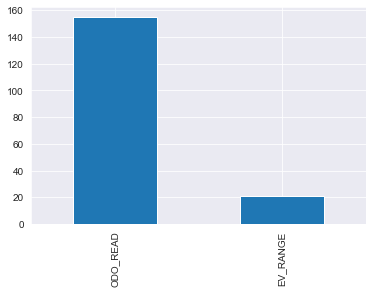

In [7]:
pd.value_counts(data['element_cd']).plot.bar()

In [8]:
odo_read = data[data['element_cd'] != "ODO_READ"].index
odo_read = data.drop(odo_read,axis = 0)

In [9]:
odo_read.head()

,vin_nbr,element_cd,element_timstm,element_val
0,1G1FZ6S05K4100048,ODO_READ,2020-06-01 03:54:15,11796.531250
1,1G1FZ6S05K4100048,ODO_READ,2020-06-01 04:53:16,11800.656250
2,1G1FZ6S05K4100048,ODO_READ,2020-06-01 04:54:47,11800.656250
3,1G1FZ6S05K4100048,ODO_READ,2020-06-01 06:19:39,11819.359375
4,1G1FZ6S05K4100048,ODO_READ,2020-06-01 10:03:13,11819.359375


In [10]:
distance = odo_read['element_val'].max() - odo_read['element_val'].min()
distance

738.453125

In [11]:
ev_range = data[data['element_cd'] != "EV_RANGE"].index
ev_range = data.drop(ev_range,axis = 0)

In [12]:
ev_range.head()

,vin_nbr,element_cd,element_timstm,element_val
8,1G1FZ6S05K4100048,EV_RANGE,2020-06-01 11:55:51,199.0
14,1G1FZ6S05K4100048,EV_RANGE,2020-06-01 13:09:42,196.0
15,1G1FZ6S05K4100048,EV_RANGE,2020-06-01 16:58:24,308.0
22,1G1FZ6S05K4100048,EV_RANGE,2020-06-02 12:38:40,287.0
39,1G1FZ6S05K4100048,EV_RANGE,2020-06-03 06:49:06,258.0


(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 <a list of 11 Text xticklabel objects>)

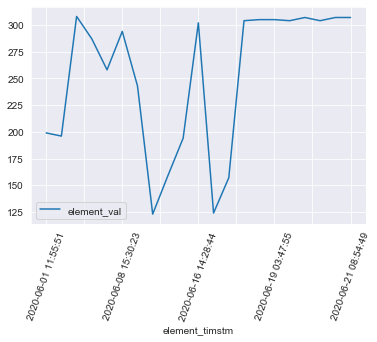

In [13]:
lines = ev_range.plot.line(x='element_timstm', y='element_val',rot=0)
plt.xticks(rotation=70)

In [16]:
index = data.index[data['element_cd'] == "EV_RANGE"].tolist()
index

[8,
 14,
 15,
 22,
 39,
 73,
 122,
 133,
 134,
 135,
 138,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155]

In [25]:
lower = 1
upper = 0
summed = []
temp = 0
for i in index:
    upper = i
    for j in range(lower, upper):
        temp = temp+float(data.iloc[j,3])-11796.531250
    lower = upper + 1
    summed.append(temp)
    temp = 0

summed

[151.984375,
 209.75,
 0,
 664.328125,
 2365.453125,
 7631.109375,
 14134.921875,
 3378.828125,
 0,
 0,
 958.390625,
 4222.03125,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]